# Đồ án cuối kỳ - Lập trình cho khoa học dữ liệu  
Họ và tên: Nguyễn Anh Nam  
MSSV: 1712604

---

## Import

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

---

## Lấy dữ liệu

Trong đồ án cuối kỳ, em sử dụng file 'full_grouped.csv' trong bộ COVID-19 Dataset được public trên Kaggle; đây là bộ dữ liệu nói về tổng số trường hợp COVID-19 đã được xác nhận bị nhiễm, tử vong và đã phục hồi từ các quốc gia khác nhau từ ngày 22 tháng 1 năm 2020. Dữ liệu gốc [ở đây](https://www.kaggle.com/imdevskp/corona-virus-report?select=covid_19_clean_complete.csv)

---

## Khám phá dữ liệu

In [2]:
covid_df = pd.read_csv('full_grouped.csv')
covid_df

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
35151,2020-07-27,West Bank and Gaza,10621,78,3752,6791,152,2,0,Eastern Mediterranean
35152,2020-07-27,Western Sahara,10,1,8,1,0,0,0,Africa
35153,2020-07-27,Yemen,1691,483,833,375,10,4,36,Eastern Mediterranean
35154,2020-07-27,Zambia,4552,140,2815,1597,71,1,465,Africa


### Số dòng và số cột của dữ liệu

In [3]:
num_rows = covid_df.shape[0]
num_cols = covid_df.shape[1]
print("Số dòng là: {0}\nSố cột là: {1}".format(num_rows, num_cols))

Số dòng là: 35156
Số cột là: 10


### Ý nghĩa của mỗi dòng và mỗi cột:

Mỗi cột được mô tả tác giả mô tả như sau:
- **Country/Region**: Quốc gia hoặc vùng lãnh thổ.
- **Date**: Ngày báo cáo.
- **Confirmed**: Tổng số ca nhiễm đến ngày báo cáo.
- **Deaths**: Tổng số ca chết đến ngày báo cáo.
- **Recovered**: Tổng số ca chữa khỏi đến ngày báo cáo.
- **Active**: Tổng số ca còn lại đến ngày báo cáo.
- **New cases**: Số ca nhiễm tại ngày báo cáo.
- **New deaths**: Số ca chết tại ngày báo cáo.
- **New recovered**: Số ca chữa khỏi tại ngày báo cáo.
- **WHO Region**: Các khu vực của tổ chức y tế thế giới quy định.

Mỗi dòng theo như dữ liệu ta thấy là thông tin về số ca nhiễm, ca tử vong, ca phục hồi tại ngày và khu vực đó.

### Kiểu dữ liệu của mỗi cột:

In [4]:
covid_df.dtypes

Date              object
Country/Region    object
Confirmed          int64
Deaths             int64
Recovered          int64
Active             int64
New cases          int64
New deaths         int64
New recovered      int64
WHO Region        object
dtype: object

Ta thấy cột "Date" có kiểu dữ liệu là `object` hay kiểu dữ liệu là `str` nhưng trong thực tế `Date` phải có dữ liệu là `Datetime` vì vậy ta phải chuyển kiểu dữ liệu của cột "Date" từ `object` sang `Datetime`.

---

## Tiền xử lí

### Chuyển dtype của cột "Date" sang Datetime

In [5]:
covid_df['Date'] = pd.to_datetime(arg=covid_df['Date'])

In [6]:
covid_df.dtypes

Date              datetime64[ns]
Country/Region            object
Confirmed                  int64
Deaths                     int64
Recovered                  int64
Active                     int64
New cases                  int64
New deaths                 int64
New recovered              int64
WHO Region                object
dtype: object

---

## Khám phá dữ liệu

In [7]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35156 entries, 0 to 35155
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            35156 non-null  datetime64[ns]
 1   Country/Region  35156 non-null  object        
 2   Confirmed       35156 non-null  int64         
 3   Deaths          35156 non-null  int64         
 4   Recovered       35156 non-null  int64         
 5   Active          35156 non-null  int64         
 6   New cases       35156 non-null  int64         
 7   New deaths      35156 non-null  int64         
 8   New recovered   35156 non-null  int64         
 9   WHO Region      35156 non-null  object        
dtypes: datetime64[ns](1), int64(7), object(2)
memory usage: 2.7+ MB


### Khoảng thời gian thu thập dữ liệu

In [8]:
time_range = covid_df['Date'].value_counts().sort_index()
col_range_df = pd.DataFrame({'Date': [time_range.index[0],time_range.index[-1]]}, index=['Min', 'Max'])
col_range_df

,Date
Min,2020-01-22
Max,2020-07-27


---

## Đưa ra các câu hỏi cần trả lời

Sau khi đã biết rõ hơn về dữ liệu, ta thấy có một số câu hỏi có thể trả lời:
- Câu 1: Trong 3 tháng đầu tiên, 10 quốc gia nào có số ca nhiễm Covid cao nhất thế giới?
- Câu 2: Tình trạng dịch bệnh của nước bị ảnh hưởng nặng nề nhất đến thời điểm hết ngày 27-07-2020 là như thế nào?
- Câu 3: Trong mỗi tháng, quốc gia nào có số ca chết nhiều nhất?
- Câu 4: Mất bao nhiêu thời gian (đơn vị là ngày) để dịch covid ảnh hưởng đến toàn thế giới (tất cả các nước và khu vực)?
- Câu 5: Tình hình kiểm soát dịch ở Việt Nam như thế nào? Đưa ra nhận xét.

---

## Tiền xử lí

Đầu tiên ta phải tiền xử lí bộ dữ liệu lại trước. Vì các câu hỏi đều liên quan đến tháng nên ta thêm cột 'Month' vào dữ liệu.

### Thêm cột 'Month' vào bộ dữ liệu:

In [9]:
covid_df = covid_df.assign(Month = lambda x: x['Date'].dt.month)
covid_df.head()

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region,Month
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean,1
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe,1
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa,1
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe,1
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa,1


In [10]:
month_range = covid_df['Month'].value_counts().sort_index()

### Miền giá trị của cột 'Month'

In [11]:
col_range_df = col_range_df.join(pd.DataFrame({'Month': [month_range.index[0],
                                                         month_range.index[-1]]}, 
                                              index=['Min', 'Max']))
col_range_df

,Date,Month
Min,2020-01-22,1
Max,2020-07-27,7


---

## Trả lời câu hỏi đã đưa ra:

### Câu 1: Trong 3 tháng đầu tiên, 10 quốc gia nào có số người nhiễm Covid nhiều nhất trên thế giới?

Để trả lời cho câu 1, ta phải thực hiện các bước sau:
- Bước 1: Lọc ra bộ dữ liệu gồm những cột "Date", "Country/Region" và "New cases" mà có tháng thuộc khoảng từ tháng 1 -> 3.
- Bước 2.1: Group by theo cột "Country/Region"
- Bước 2.2: Dùng hàm sum() để lấy ra tổng số ca nhiễm của tất cả các quốc gia/vùng lãnh thổ có trong bộ dữ liệu.
- Bước 3: Sort values theo cột "New cases".
- Bước 4: Đổi tên cột 'New cases' thành 'Confirmed' vì đây không phải là số ca nhiễm mới mỗi ngày nữa, nếu để tên là 'New cases' thì sẽ gây ra sự nhầm lẫn.
- Bước 5: Lấy 5 hàng đầu tiên của dữ liệu thu được ở bước 4.

In [12]:
# Bước 1
three_month_df = covid_df[covid_df["Month"] < col_range_df.loc['Min', 'Month'] + 3]
df = three_month_df[['Date', 'Country/Region', 'New cases']]
# Bước 2
country_df = df.groupby(['Country/Region']).sum()
# Bước 3
country_df.sort_values(by=["New cases"], ascending=False, inplace=True)
# Bước 4
country_df.rename(columns={'New cases': 'Confirmed'}, inplace=True)
# Bước 5
top_countries = country_df.iloc[:10]
top_countries

,Confirmed
Country/Region,
US,188723
Italy,105792
Spain,95923
China,81731
Germany,71808
France,52827
Iran,44605
United Kingdom,38815
Switzerland,16605


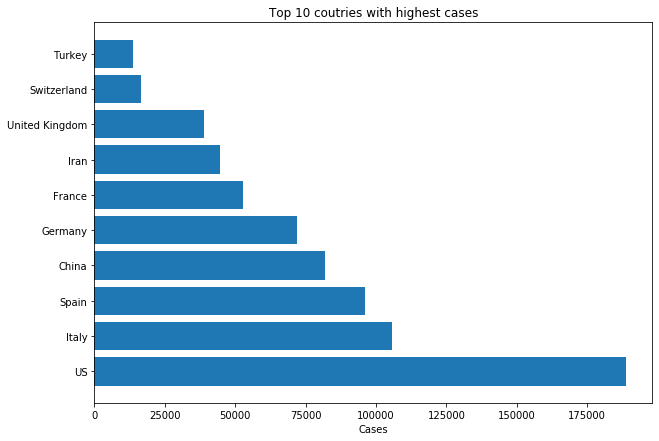

In [13]:
plt.figure(figsize=(10, 7));
plt.barh(top_countries.index,top_countries['Confirmed'])
plt.title('Top 10 coutries with highest cases');
plt.xlabel('Cases');

Qua biểu đồ ta thấy nước Mỹ có số ca nhiễm cao ngất ngưỡng (gần gấp đôi) so với nước đứng thứ nhì về số lượng người nhiễm là nước Ý.

---

### Câu 2: Tình trạng dịch bệnh của nước bị ảnh hưởng nặng nề nhất đến thời điểm hết ngày 27-07-2020 là như thế nào?

Ý tưởng để giải quyết câu này:
- Bước 1: Tìm ra nước bị ảnh hưởng nặng nề nhất sau ngày 27-07-2020.
    - Bước 1.1: Lấy ra dữ liệu có cột 'Country/Region' và 'Confirmed' ngày 27-07-2020. (Cột 'Confirmed' là tính tất cả các ca nhiễm của mỗi nước đến thời điểm ngày 27-07-2020)
    - Bước 1.2: Sort value by 'Confirmed' theo chiều giảm dần và lấy ra nước đầu tiên thì nước đó chính là nước chịu ảnh hưởng nặng nề nhất.
- Bước 2: Vẽ biểu đồ từ lúc bắt đầu đến lúc thời điểm 27-07-2020 để biết được tình hình dịch bệnh.
    - Lấy ra dữ liệu về số ca nhiễm, ca tử vong, ca phục hồi của nước đó qua từng tháng.
    - Vẽ biểu đồ.

In [14]:
#Bước 1:
recent_df = covid_df[covid_df['Date'] == col_range_df.loc['Max', 'Date']]
recent_df = recent_df[['Country/Region', 'Confirmed', 'Deaths', 'Recovered']]
recent_df.sort_values(by=['Confirmed'], inplace=True, ascending=False)
recent_df.reset_index(drop=True, inplace=True)
country_highest_cases  = recent_df.iloc[0]
country_highest_cases

Country/Region         US
Confirmed         4290259
Deaths             148011
Recovered         1325804
Name: 0, dtype: object

In [15]:
#Bước 2:
df = covid_df[covid_df['Country/Region'] == country_highest_cases['Country/Region']]
US_df = df[['Month','Confirmed', 'Deaths','Recovered']].groupby(['Month']).max()
US_df

,Confirmed,Deaths,Recovered
Month,,,
1,7,0,0
2,24,1,7
3,188724,5605,7024
4,1072667,64256,153947
5,1799124,105364,444758
6,2636414,127432,720631
7,4290259,148011,1325804


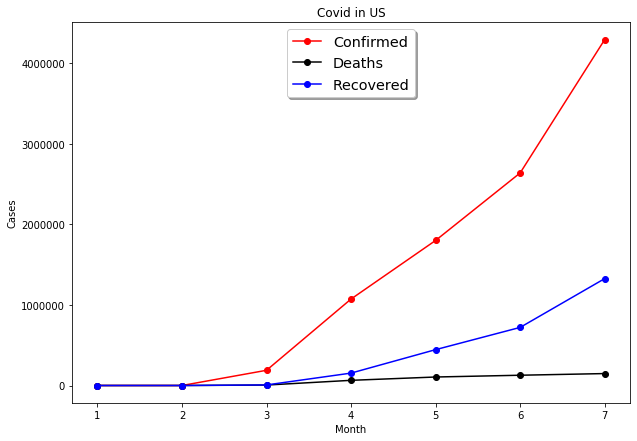

In [16]:
fig, ax = plt.subplots(figsize=(10,7))

ax.plot(US_df.index, US_df['Confirmed'], 'ro-', label='Confirmed')
ax.plot(US_df.index, US_df['Deaths'], 'ko-', label='Deaths')
ax.plot(US_df.index, US_df['Recovered'], 'bo-', label='Recovered')
legend = ax.legend(loc='upper center', shadow=True, fontsize='x-large')
plt.xlabel('Month')
plt.ylabel('Cases')
plt.title('Covid in US')
plt.show()

Từ biểu đồ của câu 1 và biểu đồ của câu 2, ta thấy nước Mỹ từ lúc vượt mặt Trung Quốc để trở thành nước có nhiều ca nhiễm nhất trên thế giới thì số ca nhiễm của nước Mỹ tăng rất nhanh - độ dốc của biểu đồ đường màu đó càng ngày càng cao hơn. Vậy lí do vì sao mà nước Mỹ - một nước tiên tiến về mặt khoa học công nghệ, cộng cho trình độ y tế thuộc loại hiện đại nhất thế giới lại - lại bị ảnh hưởng nặng nề đến như vậy?  
Câu trả lời là: 
- Do chính sách chống dịch của Mỹ có vấn đề, mỗi bang lại có cách chống dịch mỗi kiểu, không thống nhất với nhau.
- Thiếu hụt thiết bị y tế, ngày càng có nhiều người bị nhiễm Covid 19 nên các bệnh viện ở đây đã bắt đầu quá tải và thiếu hụt thiết bị y tế cũng như nhân lực.
- Người dân ở đây không tin tưởng vào cách phòng chống dịch của chính phủ, có nhiều cuộc biểu tình chống đối việc đeo khẩu trang, cách li xã hội. Ngoài ra còn có một số nhóm người vẫn còn chủ quan về dịch chẳng hạn như mở tiệc mời những người bị nhiễm covid tới và đặt cược xem ai bị nhiễm covid đầu tiên thì sẽ thắng (nguồn ở [đây](https://www.24h.com.vn/tin-tuc-quoc-te/my-thanh-nien-mo-tiec-covid-19-tu-lay-nhiem-cho-nhau-c415a1147006.html)) cho thấy ý thức vẫn còn rất kém.

---

### Câu 3: Trong mỗi tháng, quốc gia nào có số ca chết nhiều nhất?

Ý tưởng để giải quyết câu này là:
- Bước 1: Lấy ra dữ liệu gồm các cột 'Month', 'Country/Region', 'New deaths'.
- Bước 2: Group by cột 'Month', 'Country/Region' và sau đó lấy sum()
- Bước 3: Với mỗi tháng tìm xem nước nào có số chết nhiều nhất và đưa vào dictionary `month_dict`

In [17]:
df = covid_df[['Month', 'Country/Region', 'New deaths']]
countries_deaths_df= df.groupby(['Month', 'Country/Region']).sum()
countries_deaths_df.rename(columns={'New deaths': 'Deaths'}, inplace=True)

month_dict = {}
for month in range(col_range_df.loc['Min', 'Month'] , col_range_df.loc['Max', 'Month'] + 1):
    death_in_month = countries_deaths_df.loc[month]
    for country in death_in_month.index:
        if death_in_month.loc[country, 'Deaths'] == death_in_month['Deaths'].max():
            month_dict[month] = {country: death_in_month.loc[country, 'Deaths']}
            break
month_dict

{1: {'China': 196},
 2: {'China': 2624},
 3: {'Italy': 12399},
 4: {'US': 58651},
 5: {'US': 41108},
 6: {'Brazil': 30280},
 7: {'Brazil': 28024}}

---

### Câu 4: Mất bao nhiêu thời gian (đơn vị là ngày) để dịch covid ảnh hưởng đến toàn thế giới (tất cả các nước và khu vực)?

Ý tưởng để giải quyết câu này:
- Bước 1: Group by dữ liệu theo cột 'Date' và 'Country/Region' và lấy ra cột 'Confirmed' để tính tổng số ca nhiễm của mỗi quốc gia hoặc vùng lãnh thổ tại mỗi ngày.
- Bước 2: Tìm xem ngày đầu tiên mà tất cả các quốc gia đều có ca nhiễm bằng cách unstack dữ liệu ở bước 1 và kiểm tra xem với ngày đó thì có quốc gia nào không có ca nhiễm không? Nếu tất cả quốc gia đều có ca nhiễm thì lưu ngày đó vào biến `covid_date`.
- Bước 3: Tính khoảng thời gian mà toàn cầu đều bị nhiễm covid bằng cách lấy `covid_date - col_range_df.loc['Min', 'Date']` và lưu vào biến `result` 

In [18]:
df = covid_df.groupby(['Date', 'Country/Region'])['Confirmed'].sum().unstack()

covid_date = col_range_df.loc['Min', 'Date']
for date in df.index:
    is_date = True
    for country in df.columns:
        if df.loc[date, country] == 0:
            is_date = False
    if is_date:
        covid_date = date
        break

result = covid_date - col_range_df.loc['Min', 'Date']
result

Timedelta('112 days 00:00:00')

Vậy chỉ sau 112 ngày kể từ ngày đầu tiên trong dữ liệu thì toàn bộ các quốc gia và vùng lãnh thổ trong dữ liệu đã có ca nhiễm covid. Tốc độ lây lang là rất nhanh và qua đó cho thấy sự nguy hiểm của dịch Covid đối với toàn thế giới.

---

### Câu 5: Tình hình kiểm soát dịch ở Việt Nam như thế nào?

Ý tưởng giải quyết câu này: Cũng giống như ý tưởng của câu 2.

In [19]:
df = covid_df[covid_df['Country/Region'] == 'Vietnam']
VN_df = df[['Month','Confirmed', 'Deaths','Recovered']].groupby(['Month']).max()
VN_df

,Confirmed,Deaths,Recovered
Month,,,
1,2,0,0
2,16,0,16
3,212,0,58
4,270,0,225
5,328,0,279
6,355,0,335
7,431,0,365


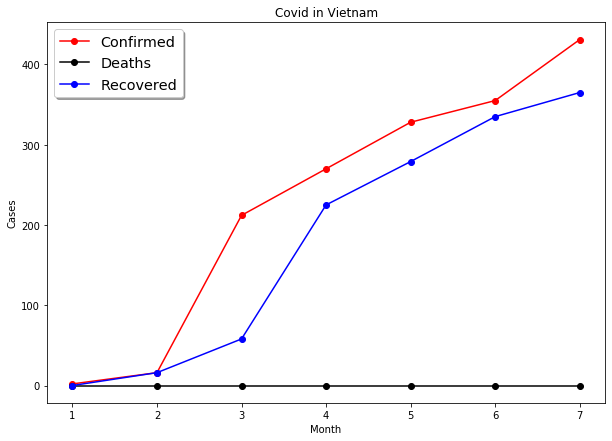

In [20]:
fig, ax = plt.subplots(figsize=(10,7))

ax.plot(VN_df.index, VN_df['Confirmed'], 'ro-', label='Confirmed')
ax.plot(VN_df.index, VN_df['Deaths'], 'ko-', label='Deaths')
ax.plot(VN_df.index, VN_df['Recovered'], 'bo-', label='Recovered')
legend = ax.legend(loc='upper left', shadow=True, fontsize='x-large')
plt.xlabel('Month')
plt.ylabel('Cases')
plt.title('Covid in Vietnam')
plt.show()

Nhận xét về kết quả:
- Trải qua 7 tháng từ khi dịch bắt đầu thì số ca nhiễm Covid-19 của Việt Nam so với các nước trên thế giới là rất ít mặc dù là nước láng giềng của Trung Quốc (nới phát hiện ra ca nhiễm Covid đầu tiên trên thế giới). Kể từ khi nước ta phát hiện ra ca nhiễm đầu tiên thì chính phủ đã ra sức chống dịch bằng cách tìm tất cả những người tiếp xúc hoặc có liên quan đến ca bệnh và bắt buộc đi cách li. Ngoài ra còn có những người từ các tâm dịch ở nước ngoài khi về nước cũng đều bị đi cách li tập trung. Người dân đều ủng hộ chính phủ, chấp nhận nghỉ làm, nghỉ học, cách li xã hội,... để có thể dập tắt dịch nên số ca nhiễm tại Việt Nam rất ít so với các nước khác.
- Qua biểu đồ, ta còn thấy số người chết do Covid tại Việt Nam vẫn là con số **0**, và số ca phục hồi cũng gần bằng số ca nhiễm. Cho thấy trình độ y tế của nước ta không kém các nước mạnh về y tế trên thế giới.
- So sánh với nước Mỹ câu 1 và 2 thì Việt Nam chống dịch hiệu quả hơn rất nhiều.

---

## Nhìn lại quá trình làm đồ án:

Sau khi đã hoàn tất, thì nhìn lại em cảm thấy học được nhiều thứ nhưng vẫn còn gặp một số khó khăn:
1. Khó khăn: 
    - Khó khăn đầu tiên chính là việc chọn dữ liệu và khám phá nó: như trong bộ dữ liệu ban đầu em không thể hiểu được cột 'Active' là gì? Phải thử rất nhiều câu lệnh và tìm hiểu trên Google thì mới biết được.
    - Việc đặt câu hỏi cũng là một vấn đề, vì không biết câu hỏi của mình có khó giải quyết hay không? Hay chỉ là 1 dòng code là có thể ra kết quả và sau khi giải quyết câu hỏi đó thì được những gì?
1. Học được: 
    - Học được cách dùng thư viện Pandas thuần thục hơn. Trước đó em vẫn hơi bị confused về câu lệnh groupby(), nhưng trong quá trình làm đồ án, đọc document và tìm hiểu cách dùng nhiều thì đã có thể dùng câu lệnh này dễ dàng hơn.
    - Học được cách dùng một số hàm của thư viện plotly để trực quan hóa dữ liệu cho đẹp hơn (nhưng vì em cài đặt thư viện bị lỗi nên không thể dùng được).
1. Nếu có thêm thời gian thì có thể em sẽ tìm hiểu một số mô hình có thể dự đoán được số ca nhiễm covid trong tương lai và  giải quyết thêm một số câu hỏi khác?

---

## Tài liệu tham khảo:

https://tuoitre.vn/vi-sao-my-thanh-vung-dich-covid-19-lon-nhat-the-gioi-20200329084219417.htm  
https://vtvgo.vn/kho-video/nhieu-nguoi-my-van-noi-khong-voi-khau-trang-801114.html  
https://www.24h.com.vn/tin-tuc-quoc-te/my-thanh-nien-mo-tiec-covid-19-tu-lay-nhiem-cho-nhau-c415a1147006.html  
https://pandas.pydata.org/docs/  
https://www.kaggle.com/  
https://machinelearningmastery.com/make-predictions-time-series-forecasting-python/  
https://plotly.com/  
https://matplotlib.org/